<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Gaussian Mixture Models**


Estimated time needed: **45** minutes


## Use cases of GMM:

- **Recommender systems** that make recommendations to users based on preferences (such as Netflix viewing patterns) of similar users (such as neighbors).
- **Anomaly detection** that identifies rare items, events or observations which deviate significantly from the majority of the data and do not conform to a well defined notion of normal behavior.
- **Customer segmentation** that aims at separating customers into multiple clusters, and devise targeted marketing strategy based on each cluster's characteristics.


## When is GMM better than K-Means?

Imagine you are a Data Scientist who builds a recommender for selling cars using K-Means clustering and you have two clusters. Everybody in cluster A is recommended to buy car A, which costs **100k** with a **25k** profit margin, and everyone in cluster B is recommended to buy car B, which costs **50k** with a **10k** profit margin.

Let's say you want to get as many people in cluster A as possible, why not use an algorithm that informs you of exactly how likely somebody would be interested in purchasing car A, instead of one that only tells you a hard yes or no (This is what K-Means does!).

With GMM, not only will you be getting the predicted cluster labels, the algorithm will also give you the probability of a data point belonging to a cluster. How amazing is that!

Whoever, is selling those cars should definitely work on a better plan for a customer with a 90% chance of purchasing, than for someone with a 75% chance of purchasing, even though they might show up in the same cluster.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%201/images/car.png" style="width: 60%">


In this lab, you will be applying clustering analysis on multivariate datasets using **Gaussian Mixture Models** (GMM).


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
            <li><a href="#Defining-Helper-Functions">Defining Helper Functions</a></li>
        </ol>
    </li>
    <li>
        <a href="#What-are-Gaussian-Mixture-Models (GMM)?">What are Gaussian Mixture Models (GMM)?</a>
        <ol>
            <li><a href="#Background">Background</a></li>
            <li><a href="#Playing around with means, standard deviations, and weights">Playing around with means, standard deviations, and weights</a></li>
            <li><a href="#Introducing sklearn.mixture.GaussianMixture">Introducing sklearn.mixture.GaussianMixture</a></li>
            <li><a href="#GMM.predict_proba">GMM.predict_proba</a></li>
        </ol>
    </li>
    <li>
        <a href="#Example 1: Applying GMM on a 2d dataset">Example 1: Applying GMM on a 2d dataset</a>
        <ol>
            <li><a href="#Generate an artificial 2d Gaussian mixture data">Generate an artificial 2d Gaussian mixture data</a></li>
            <li><a href="#Fit a GMM">Fit a GMM</a></li>
            <li><a href="#Plot the clusters">Plot the clusters</a></li>
            <li><a href="#Try different values of Covariance_type">Try different values of Covariance_type</a></li>          
        </ol>   
    </li>
    <li>
        <a href="#Example 2: Applying GMM on real world data - Image Segmentation">Example 2: Applying GMM on real world data - Image Segmentation</a>
    </li>
</ol>

<a href="#Exercises">Exercises</a>
<ol>
    <li><a href="#Exercise 1 - Scale the data (using StandardScaler)">Exercise 1 - Scale the data (using StandardScaler)</a></li>
    <li><a href="#Exercise 2 - Use PCA with n_components=2 for dimension reduction">Exercise 2 - Use PCA with n_components=2 for dimension reduction</a></li>
    <li><a href="#Exercise 3 - Fit a GMM to the reduced data ">Exercise 3 - Fit a GMM to the reduced data</a></li>
    <li><a href="#Exercise 4 - Output the predicted labels for visualizing clusters">Exercise 4 - Output the predicted labels for visualizing clusters</a></li>
    <li><a href="#Exercise 5 - Clustering and visualizing using 3 principal components (OPTIONAL)">Exercise 5 - Clustering and visualizing using 3 principal components (OPTIONAL)</a></li>
</ol>

## Objectives

After completing this lab you will be able to:

- __Understand__ what Gaussian mixture is and how its distribution parameters affect the prior probabilities.
- __Understand__ what Gaussian mixture model is and how it works as a clustering technique.
- __Apply__ GMM effectively.


----


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [14]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1 wget
# Note: If your environment doesn't support "!mamba install", use "!pip install pandas==1.3.4 ..."
# Dòng này là một comment giải thích rằng các thư viện cần thiết được liệt kê bên dưới.
# Dòng này là một comment giải thích rằng các thư viện được cài đặt sẵn trên Skills Network Labs đã được comment lại.
# Dòng này là một comment hướng dẫn cách cài đặt các thư viện bằng lệnh !mamba.
# Dòng này là một comment hướng dẫn cách cài đặt các thư viện bằng lệnh !pip nếu môi trường không hỗ trợ !mamba.

The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [15]:
# You can also use this section to suppress warnings generated by your code:
# Dòng này là một comment giải thích rằng phần này có thể được sử dụng để tắt các cảnh báo do code của bạn tạo ra.
import warnings
# Dòng này import module warnings để quản lý cảnh báo.
warnings.filterwarnings('ignore')
# Dòng này cấu hình module warnings để bỏ qua tất cả các cảnh báo.


import numpy as np
# Dòng này import thư viện numpy và đặt tên ngắn gọn là np. Numpy được sử dụng cho các phép toán số học.
import pandas as pd
# Dòng này import thư viện pandas và đặt tên ngắn gọn là pd. Pandas được sử dụng để làm việc với dữ liệu dạng bảng (DataFrame).
import scipy.stats as ss
# Dòng này import module stats từ thư viện scipy và đặt tên ngắn gọn là ss. Scipy.stats chứa các hàm phân phối thống kê.
import matplotlib.pyplot as plt
# Dòng này import module pyplot từ thư viện matplotlib và đặt tên ngắn gọn là plt. Matplotlib.pyplot được sử dụng để vẽ biểu đồ.
%matplotlib inline
# Dòng này là một magic command trong Jupyter/IPython để hiển thị biểu đồ ngay trong notebook.
from sklearn.mixture import GaussianMixture
# Dòng này import lớp GaussianMixture từ module mixture của thư viện sklearn. Lớp này được sử dụng để thực hiện mô hình hỗn hợp Gaussian (GMM).
import seaborn as sns
# Dòng này import thư viện seaborn và đặt tên ngắn gọn là sns. Seaborn là một thư viện dựa trên matplotlib để vẽ biểu đồ thống kê đẹp mắt hơn.

from sklearn.preprocessing import StandardScaler
# Dòng này import lớp StandardScaler từ module preprocessing của thư viện sklearn. StandardScaler được sử dụng để chuẩn hóa dữ liệu.
from scipy.stats import multivariate_normal
# Dòng này import lớp multivariate_normal từ module stats của thư viện scipy. Lớp này được sử dụng để làm việc với phân phối chuẩn đa biến.
from itertools import chain
# Dòng này import hàm chain từ module itertools. chain được sử dụng để kết hợp các iterable.
from matplotlib.patches import Ellipse
# Dòng này import lớp Ellipse từ module patches của thư viện matplotlib. Ellipse được sử dụng để vẽ hình elip.


sns.set_context('notebook')
# Dòng này đặt ngữ cảnh hiển thị của seaborn thành 'notebook', tối ưu hóa cho notebook.
sns.set_style('white')
# Dòng này đặt kiểu hiển thị của seaborn thành 'white'.

def warn(*args, **kwargs):
# Dòng này định nghĩa một hàm trống tên là warn.
    pass
# Dòng này là phần thân của hàm warn, không làm gì cả.
import warnings
# Dòng này import lại module warnings (có thể không cần thiết vì đã import ở trên).
warnings.warn = warn
# Dòng này gán hàm warn trống cho thuộc tính warn của module warnings, effectively disabling warnings.
warnings.filterwarnings('ignore')
# Dòng này cấu hình module warnings để bỏ qua tất cả các cảnh báo (lặp lại).

### Defining Helper Functions

_Use this section to define any helper functions to help the notebook's code readability:_


In [16]:
# This function will allow us to easily plot data taking in x values, y values, and a title
# Dòng này là một comment giải thích mục đích của hàm plot_univariate_mixture.
def plot_univariate_mixture(means, stds, weights, N = 10000, seed=10):

    """
    returns the simulated 1d dataset X, a figure, and the figure's ax

    """
    # Dòng này là docstring giải thích những gì hàm trả về.
    np.random.seed(seed)
    # Dòng này đặt seed cho bộ tạo số ngẫu nhiên của numpy để kết quả có thể tái lập.
    if not len(means)==len(stds)==len(weights):
    # Dòng này kiểm tra xem độ dài của các list means, stds và weights có bằng nhau không.
        raise Exception("Length of mean, std, and weights don't match.")
        # Dòng này ném ra một ngoại lệ nếu độ dài không khớp.
    K = len(means)
    # Dòng này lưu số lượng thành phần Gaussian (số lượng means) vào biến K.

    mixture_idx = np.random.choice(K, size=N, replace=True, p=weights)
    # Dòng này chọn ngẫu nhiên chỉ mục của các thành phần Gaussian cho mỗi điểm dữ liệu, dựa trên trọng số (weights).
    # generate N possible values of the mixture
    # Dòng này là comment giải thích bước tiếp theo.
    X = np.fromiter((ss.norm.rvs(loc=means[i], scale=stds[i]) for i in mixture_idx), dtype=np.float64)
    # Dòng này tạo ra N giá trị dữ liệu bằng cách lấy mẫu từ các phân phối chuẩn tương ứng với chỉ mục đã chọn.

    # generate values on the x axis of the plot
    # Dòng này là comment giải thích bước tiếp theo.
    xs = np.linspace(X.min(), X.max(), 300)
    # Dòng này tạo ra 300 điểm cách đều nhau trên trục x, từ giá trị nhỏ nhất đến lớn nhất của X.
    ps = np.zeros_like(xs)
    # Dòng này tạo một mảng ps có cùng kích thước với xs, chứa toàn số 0. Mảng này sẽ lưu trữ giá trị pdf của hỗn hợp Gaussian.

    for mu, s, w in zip(means, stds, weights):
    # Dòng này lặp qua các cặp (mean, std, weight) của từng thành phần Gaussian.
        ps += ss.norm.pdf(xs, loc=mu, scale=s) * w
        # Dòng này tính giá trị pdf của từng thành phần Gaussian tại các điểm xs, nhân với trọng số tương ứng và cộng vào ps.

    fig, ax = plt.subplots()
    # Dòng này tạo một figure và một axes để vẽ biểu đồ.
    ax.plot(xs, ps, label='pdf of the Gaussian mixture')
    # Dòng này vẽ đường pdf của hỗn hợp Gaussian.
    ax.set_xlabel("X", fontsize=15)
    # Dòng này đặt nhãn cho trục x.
    ax.set_ylabel("P", fontsize=15)
    # Dòng này đặt nhãn cho trục y.
    ax.set_title("Univariate Gaussian mixture", fontsize=15)
    # Dòng này đặt tiêu đề cho biểu đồ.
    #plt.show()
    # Dòng này được comment lại, nó sẽ hiển thị biểu đồ.

    return X.reshape(-1,1), fig, ax
    # Dòng này trả về dữ liệu X (đã reshape thành cột), figure và axes.


def plot_bivariate_mixture(means, covs, weights, N = 10000, seed=10):

    """
    returns the simulated 2d dataset X and a scatter plot is shown

    """
    # Dòng này là docstring giải thích những gì hàm trả về và hành động của nó.
    np.random.seed(seed)
    # Dòng này đặt seed cho bộ tạo số ngẫu nhiên của numpy.
    if not len(mean)==len(covs)==len(weights):
    # Dòng này kiểm tra xem độ dài của các list mean, covs và weights có bằng nhau không.
        raise Exception("Length of mean, std, and weights don't match.")
        # Dòng này ném ra một ngoại lệ nếu độ dài không khớp.
    K = len(means)
    # Dòng này lưu số lượng thành phần Gaussian vào biến K.
    M = len(means[0])
    # Dòng này lưu số chiều của dữ liệu (số phần tử trong mỗi mean) vào biến M.

    mixture_idx = np.random.choice(K, size=N, replace=True, p=weights)
    # Dòng này chọn ngẫu nhiên chỉ mục của các thành phần Gaussian cho mỗi điểm dữ liệu.

    # generate N possible values of the mixture
    # Dòng này là comment giải thích bước tiếp theo.
    X = np.fromiter(chain.from_iterable(multivariate_normal.rvs(mean=means[i], cov=covs[i]) for i in mixture_idx),
                dtype=float)
    # Dòng này tạo ra N giá trị dữ liệu bằng cách lấy mẫu từ các phân phối chuẩn đa biến tương ứng với chỉ mục đã chọn.
    X.shape = N, M
    # Dòng này reshape mảng X thành kích thước (N, M).

    xs1 = X[:,0]
    # Dòng này lấy cột đầu tiên của X (trục x1).
    xs2 = X[:,1]
    # Dòng này lấy cột thứ hai của X (trục x2).

    plt.scatter(xs1, xs2, label="data")
    # Dòng này vẽ biểu đồ scatter cho dữ liệu đã tạo.

    L = len(means)
    # Dòng này lưu số lượng means (số lượng thành phần Gaussian) vào biến L.
    for l, pair in enumerate(means):
    # Dòng này lặp qua các mean và chỉ mục của chúng.
        plt.scatter(pair[0], pair[1], color='red')
        # Dòng này vẽ điểm biểu diễn mean của từng thành phần Gaussian.
        if l == L-1:
        # Dòng này kiểm tra xem đây có phải là mean cuối cùng không.
            break
            # Dòng này thoát khỏi vòng lặp nếu là mean cuối cùng.
    plt.scatter(pair[0], pair[1], color='red', label="mean")
    # Dòng này vẽ điểm biểu diễn mean cuối cùng và thêm nhãn "mean".

    plt.xlabel("$x_1$")
    # Dòng này đặt nhãn cho trục x1.
    plt.ylabel("$x_2$")
    # Dòng này đặt nhãn cho trục x2.
    plt.title("Scatter plot of the bivariate Gaussian mixture")
    # Dòng này đặt tiêu đề cho biểu đồ.
    plt.legend()
    # Dòng này hiển thị chú giải (legend) trên biểu đồ.
    plt.show()
    # Dòng này hiển thị biểu đồ.

    return X
    # Dòng này trả về dữ liệu X đã tạo.


def draw_ellipse(position, covariance, ax=None, **kwargs):

    """
    Draw an ellipse with a given position and covariance

    """
    # Dòng này là docstring giải thích mục đích của hàm draw_ellipse.
    ax = ax or plt.gca()
    # Dòng này lấy axes hiện tại nếu không có axes nào được truyền vào.

    # Convert covariance to principal axes
    # Dòng này là comment giải thích bước tiếp theo.
    if covariance.shape == (2, 2):
    # Dòng này kiểm tra xem ma trận hiệp phương sai có kích thước 2x2 không.
        U, s, Vt = np.linalg.svd(covariance)
        # Dòng này thực hiện phân tích giá trị kỳ dị (SVD) trên ma trận hiệp phương sai.
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        # Dòng này tính góc quay của elip dựa trên vector riêng của ma trận hiệp phương sai.
        width, height = 2 * np.sqrt(s)
        # Dòng này tính chiều rộng và chiều cao của elip dựa trên giá trị riêng của ma trận hiệp phương sai.
    else:
    # Dòng này xử lý trường hợp ma trận hiệp phương sai không phải 2x2 (ví dụ: đường tròn).
        angle = 0
        # Dòng này đặt góc quay bằng 0.
        width, height = 2 * np.sqrt(covariance)
        # Dòng này tính chiều rộng và chiều cao dựa trên căn bậc hai của hiệp phương sai (đối với trường hợp đường tròn).

    # Draw the Ellipse
    # Dòng này là comment giải thích bước tiếp theo.
    for nsig in range(1, 4):
    # Dòng này lặp qua các giá trị nsig từ 1 đến 3.
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))
        # Dòng này thêm một hình elip vào axes, với tâm tại position, chiều rộng và chiều cao tỷ lệ với nsig, góc quay và các tham số bổ sung.


def plot_gmm(gmm, X, label=True, ax=None):
    # Dòng này định nghĩa hàm plot_gmm để vẽ kết quả phân cụm GMM.
    ax = ax or plt.gca()
    # Dòng này lấy axes hiện tại nếu không có axes nào được truyền vào.
    labels = gmm.fit(X).predict(X)
    # Dòng này fit mô hình GMM vào dữ liệu X và dự đoán nhãn cho từng điểm dữ liệu.
    if label:
    # Dòng này kiểm tra xem có nên tô màu các điểm dữ liệu theo nhãn dự đoán không.
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
        # Dòng này vẽ biểu đồ scatter, tô màu các điểm theo nhãn.
    else:
    # Dòng này xử lý trường hợp không tô màu các điểm dữ liệu theo nhãn.
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
        # Dòng này vẽ biểu đồ scatter mà không tô màu theo nhãn.
    ax.axis('equal')
    # Dòng này đặt tỷ lệ trục x và y bằng nhau.

    w_factor = 0.2 / gmm.weights_.max()
    # Dòng này tính một hệ số tỷ lệ cho độ trong suốt của elip dựa trên trọng số lớn nhất của các thành phần Gaussian.
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    # Dòng này lặp qua các cặp (mean, covariance, weight) của các thành phần Gaussian đã fit.
        draw_ellipse(pos, covar, alpha=w * w_factor)
        # Dòng này vẽ hình elip cho từng thành phần Gaussian, với tâm, ma trận hiệp phương sai và độ trong suốt dựa trên trọng số.

## What are Gaussian Mixture Models (GMM)?

Put simply, Gaussian Mixture Models (GMM) is a clustering algorithm that:

- Fits a weighted combination of Gaussian distributions to your data
- The data scientist (you) needs to determine the number of gaussian distributions (`k`)


<p style='color: blue'>Hard vs Soft Clustering:</p>

- __Hard clustering__ algorithms assign each data point to exactly one cluster.
- __Soft clustering__ algorithms return probabilities of each data point belonging to all `k` clusters

_GMM is a soft clustering algorithm._


### Background


A Gaussian mixture is a weighted combination of (`k`) Gaussians, where each is identified by the following parameters:

 1. a mean vector $\boldsymbol{\mu}_i$
 2. a covariance matrix $\boldsymbol{\Sigma}_i$
 3. a component weight $\pi_i$ that indicates the contribution of the $i$th Gaussian

When put altogether, the pdf of the mixture model is formulated as:

$$
p(\boldsymbol{x}) = \sum_{i=1}^K\pi_i \mathcal{N}(x|\boldsymbol{\mu_i,\Sigma_i}), \\\\\\ \sum_{i=1}^K\pi_i = 1
$$

Before we start applying the model in a multivariate setting, let's delve into the three parameters and see how changing the parameter values affect the appearance of the Gaussian mixture in a lower dimension.

_We will use the helper function **plot_univariate_mixture** to plot the mixture efficiently._


### Playing around with means, standard deviations, and weights

Let's start with a mixture of 3 univariate Gaussians with
- means equal to **2, 5, 8** respectively
- std equal to **0.2, 0.5, 0.8** respectively
- component weight equal to **0.3, 0.3, 0.4** respectively


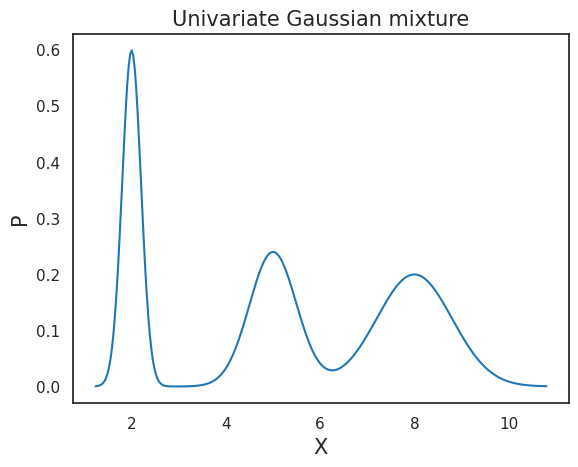

In [17]:
X1, fig1, ax1 = plot_univariate_mixture(means=[2,5,8], stds=[0.2, 0.5, 0.8], weights=[0.3, 0.3, 0.4])
# Dòng này gọi hàm plot_univariate_mixture với các tham số đã cho và lưu kết quả vào X1, fig1, ax1.

The peaks in the distribution (pdf) plot above are around the x = 2, 5, 8, which are the means of our Gaussians.

If we increase the value of the standard deviations, we will see the bell shapes become wider and there will be overlaps between two Gaussians.


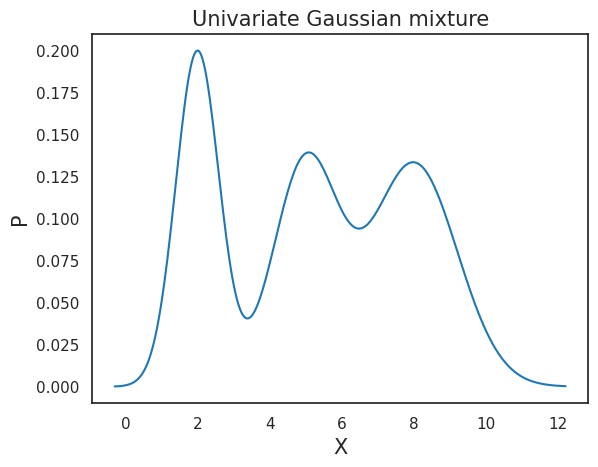

In [18]:
X2, fig2, ax2 = plot_univariate_mixture(means=[2,5,8], stds=[0.6, 0.9, 1.2], weights=[0.3, 0.3, 0.4])
# Dòng này gọi hàm plot_univariate_mixture với các tham số đã cho (thay đổi stds) và lưu kết quả vào X2, fig2, ax2.

Keeping the means and standard deviations unchanged, let's change the weights of the Gaussians and see how it affects the mixture's distribution.


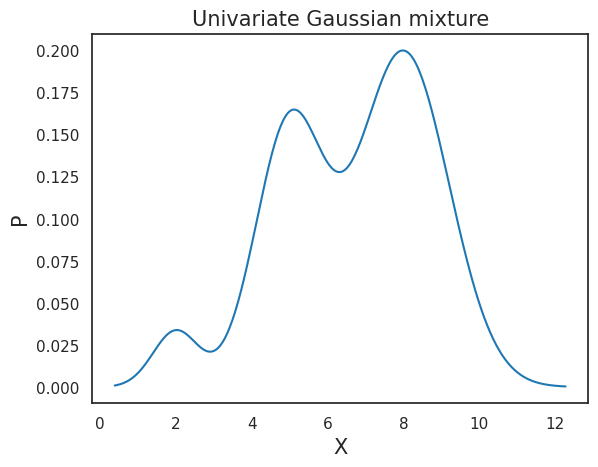

In [19]:
X3, fig3, ax3 = plot_univariate_mixture(means=[2,5,8], stds=[0.6, 0.9, 1.2], weights=[0.05, 0.35, 0.6])
# Dòng này gọi hàm plot_univariate_mixture với các tham số đã cho (thay đổi weights) và lưu kết quả vào X3, fig3, ax3.

When the weight of one Gaussian is reduced or increased, the likelihood of seeing a point from that Gaussian also decreases or increases, as illustrated in the distribution plot above.

Hence, in conclusion, the **means** determine the centers of the mixed Gaussians; the **covariance** matrices determine the width and shape of the mixed Gaussians; the **weights** determine the contributions of the Gaussians to the Gaussian mixture.


### Introducing sklearn.mixture.GaussianMixture


With generated Gaussian mixture data, we know in advance the parameter values of the individual Gaussians. When we encounter a real-world dataset, how do we know the number of Gaussians to be included in the mixture model and their corresponding parameter values?

We can utilize the **GaussianMixture** class from **Scikit-learn**. This class allows us to estimate the parameters of a Gaussian mixture distribution.

A **GaussianMixture.fit** method is provided that learns a Gaussian Mixture Model from training data. Given test data, it can assign to each sample the Gaussian it mostly probably belong to using the **GaussianMixture.predict** method.

To solve for the parameters of GMM, the **EM algorithm** is implemented. **E** stands for **Expectation** and **M** stands for **Maximization**. The algorithm works by alternating between an **E** step, which calculates the expectation of the log-likelihood of observing the dataset using the current parameter estimates, and a **M** step, which seeks new parameters estimates that maximize the expectation found in the previous E step. This process is repeated  until convergence.

For more detailed information on the **EM algorithm**, please see the page:<a href="https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01"> EM-link</a>


### GMM.predict_proba


One parameter you must specify when implementing a GMM is `n_components`, which tells the algorithm how many clusters to look for in the dataset. Another parameter you should consider is `covariance_type`, which we will talk about later with a multivariate dataset.

Starting with **X1**, the univariate dataset we generated before using **plot_univariate_mixture**, we can fit a GMM to it with `n_components = 3` and plot the predicted prior probabilities of each point belonging to the 3 clusters. **GMM.predict_proba_** evaluates the components' density for each sample or for sample $x_n$ the probability  $p(i|x_{n})$


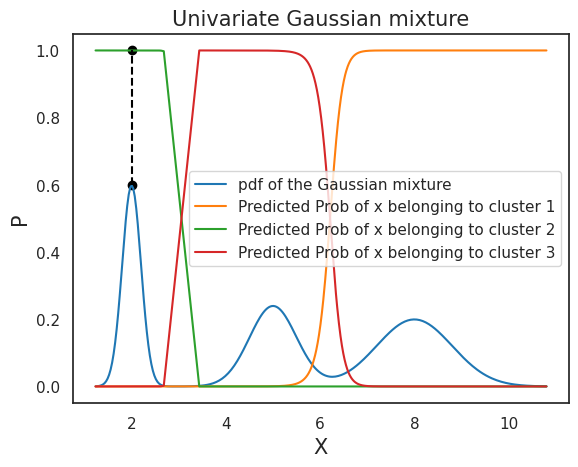

In [20]:
# sort X1 in ascending order for plotting purpose
# Dòng này là comment giải thích mục đích của việc sắp xếp X1.
X1_sorted = np.sort(X1.reshape(-1)).reshape(-1,1)
# Dòng này sắp xếp mảng X1 theo thứ tự tăng dần, sau đó reshape lại thành cột.

# fit the GMM
# Dòng này là comment giải thích bước tiếp theo.
GMM = GaussianMixture(n_components=3, random_state=10)
# Dòng này tạo một đối tượng GaussianMixture với 3 thành phần và random_state là 10 để kết quả có thể tái lập.
GMM.fit(X1_sorted)
# Dòng này fit mô hình GMM vào dữ liệu X1_sorted.

# store the predicted probabilities in prob_X1
# Dòng này là comment giải thích bước tiếp theo.
prob_X1 = GMM.predict_proba(X1_sorted)
# Dòng này tính toán xác suất dự đoán của mỗi điểm dữ liệu thuộc về từng cluster và lưu vào prob_X1.

# start plotting!
# Dòng này là comment đánh dấu bắt đầu phần vẽ biểu đồ.
ax1.plot(X1_sorted, prob_X1[:,0], label='Predicted Prob of x belonging to cluster 1')
# Dòng này vẽ đường biểu diễn xác suất dự đoán của X1_sorted thuộc về cluster 1.
ax1.plot(X1_sorted, prob_X1[:,1], label='Predicted Prob of x belonging to cluster 2')
# Dòng này vẽ đường biểu diễn xác suất dự đoán của X1_sorted thuộc về cluster 2.
ax1.plot(X1_sorted, prob_X1[:,2], label='Predicted Prob of x belonging to cluster 3')
# Dòng này vẽ đường biểu diễn xác suất dự đoán của X1_sorted thuộc về cluster 3.
ax1.scatter(2, 0.6, color='black')
# Dòng này vẽ một điểm scatter màu đen tại tọa độ (2, 0.6).
ax1.scatter(2, 1.0, color='black')
# Dòng này vẽ một điểm scatter màu đen tại tọa độ (2, 1.0).
ax1.plot([2, 2], [0.6, 1.0],'--', color='black')
# Dòng này vẽ một đường nét đứt màu đen nối hai điểm (2, 0.6) và (2, 1.0).
ax1.legend()
# Dòng này hiển thị chú giải (legend) trên biểu đồ.
fig1
# Dòng này hiển thị figure fig1.

To interpret the predicted probabilities, let's take a look at the point colored in black, as an example. On the Gaussian mixture pdf, the point is at the the peak of the first bell-shaped curve. Its corresponding probability of belonging to cluster 1 is equal to 1, which demonstrates that the probability of the center of a Gaussian distribution belonging to its own cluster is 100%.


## Example 1: Applying GMM on a 2d dataset


### Generate an artificial 2d Gaussian mixture data


We will use the helper function **plot_bivariate_mixture** to first generate a 2d Gaussian mixture dataset, and then visualize the data points.


In [21]:
# setting parameter values for the Gaussian mixture data
# Dòng này là comment giải thích mục đích của phần code này.
# we include three Gaussians in this example
# Dòng này là comment giải thích rằng ví dụ này sử dụng ba thành phần Gaussian.

mean = [(1,5), (2,1), (6,2)]
# Dòng này định nghĩa danh sách các vector mean cho ba thành phần Gaussian.
cov1 = np.array([[0.5, 1.0],[1.0, 0.8]])
# Dòng này định nghĩa ma trận hiệp phương sai cho thành phần Gaussian thứ nhất.
cov2 = np.array([[0.8, 0.4],[0.4, 1.2]])
# Dòng này định nghĩa ma trận hiệp phương sai cho thành phần Gaussian thứ hai.
cov3 = np.array([[1.2, 1.3],[1.3, 0.9]])
# Dòng này định nghĩa ma trận hiệp phương sai cho thành phần Gaussian thứ ba.
cov = [cov1, cov2, cov3]
# Dòng này tạo một danh sách chứa ba ma trận hiệp phương sai.
weights = [0.3, 0.3, 0.4]
# Dòng này định nghĩa danh sách các trọng số cho ba thành phần Gaussian.

X4 = plot_bivariate_mixture(means=mean, covs=cov, weights=weights, N=1000)
# Dòng này gọi hàm plot_bivariate_mixture để tạo dữ liệu hỗn hợp Gaussian 2D và vẽ biểu đồ scatter, lưu dữ liệu vào X4.

ValueError: The input matrix must be symmetric positive semidefinite.

To work with GMM, we can use the **GaussianMixture** function from **sklearn.mixture**. The function will fit a GMM to our data and return the clustering result which includes the parameter values we discussed.


In [22]:
print("The dataset we generated has a shape of", X4.shape)
# Dòng này in ra kích thước (shape) của tập dữ liệu X4 đã tạo.

NameError: name 'X4' is not defined

### Fit a GMM


In [23]:
# since we generated a mixture dataset X4 with 3 Gaussians, it makes sense to set n_components = 3.
# Dòng này là comment giải thích lý do chọn n_components = 3.
gm = GaussianMixture(n_components=3, random_state=0).fit(X4)
# Dòng này tạo một đối tượng GaussianMixture với 3 thành phần và random_state là 0, sau đó fit mô hình vào dữ liệu X4.
print("Means of the 3 Gaussians fitted by GMM are\n")
# Dòng này in ra một dòng văn bản thông báo về các mean được fit.
print(gm.means_)
# Dòng này in ra các mean của ba thành phần Gaussian được fit bởi mô hình GMM.

NameError: name 'X4' is not defined

In [24]:
print("Covariances of the 3 Gaussians fitted by GMM are")
# Dòng này in ra một dòng văn bản thông báo về các covariances được fit.
gm.covariances_
# Dòng này hiển thị các ma trận hiệp phương sai của ba thành phần Gaussian được fit bởi mô hình GMM.

Covariances of the 3 Gaussians fitted by GMM are


NameError: name 'gm' is not defined

The 3 centers returned by our fitted GMM are all very close to the means we set for generating the mixture data, which means the model fitting was quite successful.

We can also draw the 3 ellipses, using the fitted parameter values, to check if they indeed represent the 3 clusters from our generated data.


### Plot the clusters


We will use the helper functions **draw_ellipse** and **plot_gmm** to plot the original scatter plot as well as the clusters produced by a fitted GMM.


In [25]:
plot_gmm(GaussianMixture(n_components=3, random_state=0), # the model,
# Dòng này gọi hàm plot_gmm để vẽ kết quả phân cụm GMM. Nó tạo một đối tượng GaussianMixture với 3 thành phần và random_state là 0 làm tham số đầu tiên (mô hình).
          X4) # simulated Gaussian mixture data
# Dòng này truyền dữ liệu X4 (dữ liệu hỗn hợp Gaussian mô phỏng) làm tham số thứ hai.

NameError: name 'X4' is not defined

### Try different values of Covariance_type


For the **sklearn.mixture.GaussianMixture** function, not only can we specify the number of clusters we want the GMM to fit, we can also specify the type of covariance parameters to use (recall we discussed that **covariance** matrices determine the shapes of our Gaussians. Depending on the dataset (different datasets have different Gaussian mixture structures), there are 4 values you can try for **Covariance_type**:

- `full` each component has its own general covariance matrix.
- `tied` all components share the same general covariance matrix.
- `diag` each component has its own diagonal covariance matrix.
- `spherical` each component has its own single variance.

_The default **Covariance_type** in **sklearn.mixture.GaussianMixture** is `full`._

**Sometimes you can't use covariance_type = full, because you can't invert it and this will give you an error.**


In [26]:
# try Covariance_type = 'tied'
# Dòng này là comment giải thích rằng chúng ta sẽ thử với Covariance_type = 'tied'.
plot_gmm(GaussianMixture(n_components=3, covariance_type='tied',random_state=0), # the model,
# Dòng này gọi hàm plot_gmm với một mô hình GaussianMixture có Covariance_type='tied'.
         X4)
# Dòng này truyền dữ liệu X4.

NameError: name 'X4' is not defined

In [27]:
# try Covariance_type = 'diag'
# Dòng này là comment giải thích rằng chúng ta sẽ thử với Covariance_type = 'diag'.
plot_gmm(GaussianMixture(n_components=3, covariance_type='diag',random_state=0), # the model,
# Dòng này gọi hàm plot_gmm với một mô hình GaussianMixture có Covariance_type='diag'.
         X4)
# Dòng này truyền dữ liệu X4.

NameError: name 'X4' is not defined

It is clear visually that **covariance_type =** `full` is a good choice for the generated data. This makes sense because we did intentionally make each Gaussian have its own covariance matrix.

Now we know how to work with GMM in a lower dimension (2d), we can import a real-world dataset and use GMM to perform a clustering analysis on it.


## Example 2: Applying GMM on real world data - Image Segmentation


Image segmentation is the process of segmenting an image into multiple important regions.

We can use a GMM to segment an image into **K** regions `(n_components = K)` according to significant colors.

Each pixel would be a data point with three features (r, g, b), or one feature, if greyscale.

For instance, if we are working with a 256 $\times$ 256 image, you would have 65536 pixels in total and your data $X$ would have a shape of 65536 $\times$ 3.

Let's look at an example using a picture of a house cat:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%201/images/gauss-cat.jpeg" style="width: 50%">


Let's download the image:


In [28]:
! wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%201/images/gauss-cat.jpeg
# Dòng này sử dụng lệnh wget (lệnh shell) để tải xuống tệp ảnh gauss-cat.jpeg từ URL được cung cấp.

--2025-10-17 17:52:58--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%201/images/gauss-cat.jpeg
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 983483 (960K) [image/jpeg]
Saving to: ‘gauss-cat.jpeg’

gauss-cat.jpeg      100%[===================>] 960.43K  2.27MB/s    in 0.4s    

2025-10-17 17:52:59 (2.27 MB/s) - ‘gauss-cat.jpeg’ saved [983483/983483]



First, let's segment our image using 2 gaussian distributions:


In [29]:
img = plt.imread('gauss-cat.jpeg')
# Dòng này đọc tệp ảnh gauss-cat.jpeg vào một mảng numpy bằng cách sử dụng plt.imread.

# If img is greyscale, then change to .reshape(-1, 1):
# Dòng này là comment hướng dẫn cách xử lý nếu ảnh là ảnh xám.
X = img.reshape(-1, 3)
# Dòng này reshape mảng ảnh thành một mảng 2D, với mỗi hàng là một pixel và ba cột là giá trị màu RGB của pixel đó.
# The number of components; you can change this to a positive integer of your choice!:
# Dòng này là comment giải thích biến n và gợi ý thay đổi nó.
n = 2
# Dòng này đặt số lượng thành phần Gaussian (số lượng cluster) là 2.
gmm = GaussianMixture(n_components=n, covariance_type='tied')
# Dòng này tạo một đối tượng GaussianMixture với số lượng thành phần là n và covariance_type='tied'.
gmm.fit(X)
# Dòng này fit mô hình GMM vào dữ liệu ảnh X.
labels = gmm.predict(X) # num of pixels x 1
# Dòng này dự đoán nhãn cluster cho từng pixel trong dữ liệu X và lưu vào mảng labels.

Now, we replace each pixel with the "average color" or the mean RGB values of the gaussian distribution it belongs to:


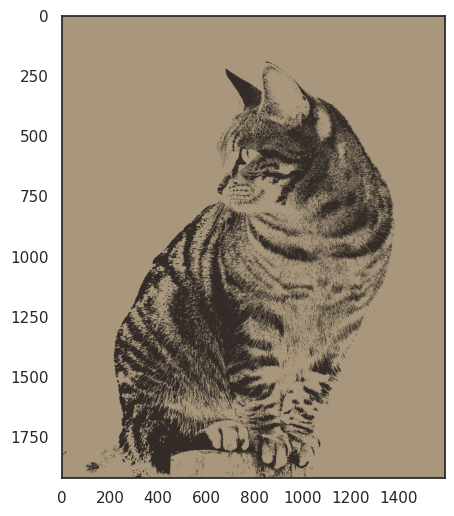

In [30]:
seg = np.zeros(X.shape) # num of pixels x 3
# Dòng này tạo một mảng numpy mới có cùng kích thước với X, chứa toàn số 0. Mảng này sẽ lưu trữ ảnh đã phân đoạn.

for label in range(n):
# Dòng này lặp qua từng nhãn cluster (từ 0 đến n-1).
    seg[labels == label] = gmm.means_[label]
    # Dòng này gán giá trị mean (màu trung bình) của cluster hiện tại cho tất cả các pixel có nhãn tương ứng.
seg = seg.reshape(img.shape).astype(np.uint8)
# Dòng này reshape mảng seg trở lại kích thước ban đầu của ảnh và chuyển kiểu dữ liệu sang uint8 (kiểu dữ liệu cho màu ảnh).
#cv2.imwrite(f'gauss-cat-{n}.jpeg', seg)
# Dòng này được comment lại, nó sẽ lưu ảnh đã phân đoạn bằng thư viện cv2.

plt.figure(figsize=(6,6))
# Dòng này tạo một figure mới với kích thước 6x6 inch.
plt.imshow(seg)
# Dòng này hiển thị ảnh đã phân đoạn.

Similarly, if we increase the number of components to 8:


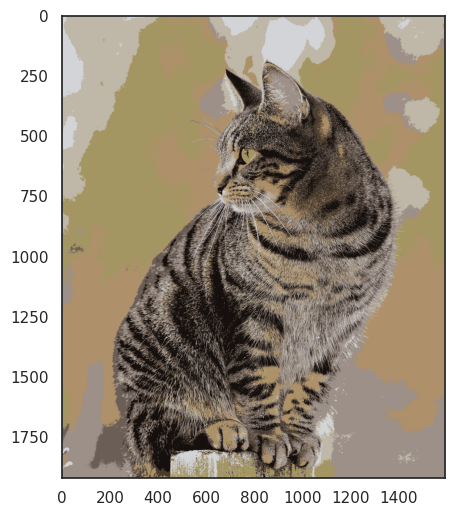

In [31]:
n = 8
# Dòng này đặt số lượng thành phần Gaussian (số lượng cluster) là 8.
gmm = GaussianMixture(n_components=n, covariance_type='tied')
# Dòng này tạo một đối tượng GaussianMixture mới với 8 thành phần và covariance_type='tied'.
gmm.fit(X)
# Dòng này fit mô hình GMM mới vào dữ liệu ảnh X.
labels = gmm.predict(X) # num of pixels x 1
# Dòng này dự đoán nhãn cluster cho từng pixel bằng mô hình mới và lưu vào mảng labels.
seg = np.zeros(X.shape) # num of pixels x 3
# Dòng này tạo một mảng numpy mới có cùng kích thước với X, chứa toàn số 0, để lưu ảnh đã phân đoạn.

for label in range(n):
# Dòng này lặp qua từng nhãn cluster (từ 0 đến n-1).
    seg[labels == label] = gmm.means_[label]
    # Dòng này gán giá trị mean (màu trung bình) của cluster hiện tại cho tất cả các pixel có nhãn tương ứng.
seg = seg.reshape(img.shape).astype(np.uint8)
# Dòng này reshape mảng seg trở lại kích thước ban đầu của ảnh và chuyển kiểu dữ liệu sang uint8.
#cv2.imwrite(f'gauss-cat-{n}.jpeg', seg)
# Dòng này được comment lại, nó sẽ lưu ảnh đã phân đoạn.

plt.figure(figsize=(6,6))
# Dòng này tạo một figure mới với kích thước 6x6 inch.
plt.imshow(seg)
# Dòng này hiển thị ảnh đã phân đoạn.
plt.show()
# Dòng này hiển thị biểu đồ.

Our segmented image looks remarkably similar to the original, even though it uses only 8 colors!


# Exercises


For the exercises, we will use the Customer Personality Analysis dataset ([marketing_campaign.csv](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01)) from Kaggle, provided by Dr. Omar Romero-Hernandez. Several preprocessing steps were taken, including but not limited to, impute missing values, feature engineering, and feature encoding.

The preprocessed customers dataset contains 19 attributes on the customers' purchasing behaviors, education, income, marital status, etc. You will be able to practice principal component analysis, and apply GMM on the dataset for the purpose of customer segmentation.


First we load data into a `pandas.DataFrame`:


In [32]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%201/customers.csv")
# Dòng này đọc dữ liệu từ tệp customers.csv trên cloud storage vào một DataFrame của pandas.
data.head()
# Dòng này hiển thị 5 dòng đầu tiên của DataFrame data.

# you can also download the csv file to your local workspace using:
# Dòng này là comment hướng dẫn cách tải tệp csv về máy tính cục bộ.
# ! wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%201/customers.csv
# Dòng này được comment lại, nó sử dụng lệnh wget để tải tệp csv.

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Spent,Living_Status,Children
0,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,1617,0,0
1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,27,0,2
2,0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,776,1,0
3,0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,53,1,1
4,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,422,1,1


In [33]:
data.shape
# Dòng này hiển thị kích thước (số hàng và số cột) của DataFrame data.

(2216, 19)

### Exercise 1 - Scale the data (using StandardScaler)


In [34]:
from sklearn.preprocessing import StandardScaler
# Dòng này import lớp StandardScaler từ sklearn.preprocessing.
SS = # TODO
# Dòng này là placeholder, cần tạo một đối tượng StandardScaler.
X = # TODO
# Dòng này là placeholder, cần fit và transform dữ liệu bằng StandardScaler.

SyntaxError: invalid syntax (ipython-input-3579125865.py, line 3)

<details>
    <summary>Click here for Solution</summary>

```python
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = SS.fit(data).transform(data)
```

</details>


### Exercise 2 - Use PCA with n_components = 2 for dimension reduction


In [35]:
from sklearn.decomposition import PCA
# Dòng này import lớp PCA từ sklearn.decomposition.
pca2 = # TODO
# Dòng này là placeholder, cần tạo một đối tượng PCA với n_components=2.
reduced_2_PCA = # TODO
# Dòng này là placeholder, cần fit và transform dữ liệu bằng PCA.

SyntaxError: invalid syntax (ipython-input-1286883339.py, line 3)

<details>
    <summary>Click here for Solution</summary>

```python
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
reduced_2_PCA = pca2.fit(X).transform(X)
```

</details>


### Exercise 3 - Fit a GMM to the reduced data


In [36]:
model = # TODO
# Dòng này là placeholder, cần tạo một đối tượng GaussianMixture và fit nó vào dữ liệu đã giảm chiều.

SyntaxError: invalid syntax (ipython-input-690650549.py, line 1)

<details>
    <summary>Click here for Solution</summary>

```python
model = GaussianMixture(n_components=4, random_state=0)
model.fit(reduced_2_PCA)
```

</details>


### Exercise 4 - Output the predicted labels for visualizing clusters


In [37]:
PCA_2_pred = # TODO
# Dòng này là placeholder, cần sử dụng mô hình GMM đã fit để dự đoán nhãn cho dữ liệu đã giảm chiều.

SyntaxError: invalid syntax (ipython-input-974511824.py, line 1)

<details>
    <summary>Click here for Solution</summary>

```python
PCA_2_pred = model.predict(reduced_2_PCA)
```

</details>


Now you can plot the clusters in 2d using 2 principal components, colored by predicted labels.


In [38]:
x = # TODO
# Dòng này là placeholder, cần lấy cột đầu tiên của dữ liệu đã giảm chiều (thành phần chính thứ nhất).
y = # TODO
# Dòng này là placeholder, cần lấy cột thứ hai của dữ liệu đã giảm chiều (thành phần chính thứ hai).
plt.scatter(x, y, c=PCA_2_pred)
# Dòng này vẽ biểu đồ scatter của dữ liệu đã giảm chiều, tô màu các điểm theo nhãn dự đoán.
plt.title("2d visualization of the clusters")
# Dòng này đặt tiêu đề cho biểu đồ.
plt.xlabel("PCA 1")
# Dòng này đặt nhãn cho trục x là "PCA 1".
plt.ylabel("PCA 2")
# Dòng này đặt nhãn cho trục y là "PCA 2".

SyntaxError: invalid syntax (ipython-input-4232294217.py, line 1)

<details>
    <summary>Click here for Solution</summary>

```python
x = reduced_2_PCA[:,0]
y = reduced_2_PCA[:,1]
plt.scatter(x, y, c=PCA_2_pred)
plt.title("2d visualization of the clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
```

</details>


### Exercise 5 - Clustering and visualizing using 3 principal components (OPTIONAL)


In [39]:
# use PCA with n=3 and implement GMM to make predictions
# Dòng này là comment giải thích mục đích của phần code này (sử dụng PCA với 3 thành phần và GMM).

pca3 = # TODO
# Dòng này là placeholder, cần tạo một đối tượng PCA với n_components=3.
reduced_3_PCA = # TODO
# Dòng này là placeholder, cần fit và transform dữ liệu bằng PCA.
mod = # TODO
# Dòng này là placeholder, cần tạo một đối tượng GaussianMixture và fit nó vào dữ liệu đã giảm chiều.
PCA_3_pred = # TODO
# Dòng này là placeholder, cần sử dụng mô hình GMM đã fit để dự đoán nhãn cho dữ liệu đã giảm chiều.

# plotting
# Dòng này là comment đánh dấu bắt đầu phần vẽ biểu đồ.

reduced_3_PCA = pd.DataFrame(reduced_3_PCA, columns=(['PCA 1', 'PCA 2', 'PCA 3']))
# Dòng này tạo một DataFrame từ dữ liệu đã giảm chiều 3D và đặt tên cột.
fig = plt.figure(figsize=(10,8))
# Dòng này tạo một figure mới với kích thước 10x8 inch.
ax = fig.add_subplot(111, projection="3d")
# Dòng này thêm một subplot 3D vào figure.
ax.scatter(reduced_3_PCA['PCA 1'],reduced_3_PCA['PCA 2'],reduced_3_PCA['PCA 3'], c=PCA_3_pred)
# Dòng này vẽ biểu đồ scatter 3D của dữ liệu đã giảm chiều, tô màu các điểm theo nhãn dự đoán.
ax.set_title("3D projection of the clusters")
# Dòng này đặt tiêu đề cho biểu đồ 3D.

SyntaxError: invalid syntax (ipython-input-35596180.py, line 4)

<details>
    <summary>Click here for Solution</summary>

```python
# PCA with n=3 and clustering
pca3 = PCA(n_components=3)
reduced_3_PCA = pca3.fit(X).transform(X)
mod = GaussianMixture(n_components=4, random_state=0)
PCA_3_pred = mod.fit(reduced_3_PCA).predict(reduced_3_PCA)

# plotting
reduced_3_PCA = pd.DataFrame(reduced_3_PCA, columns=(['PCA 1', 'PCA 2', 'PCA 3']))
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(reduced_3_PCA['PCA 1'],reduced_3_PCA['PCA 2'],reduced_3_PCA['PCA 3'], c=PCA_3_pred)
ax.set_title("3D projection of the clusters")
```

</details>


## Congratulations! You have completed this lab!


## Authors


[Roxanne Li](https://www.linkedin.com/in/roxanne-li/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) is a Data Science intern at IBM Skills Network, entering level-5 study in the Mathematics & Statistics undergraduate Coop program at McMaster University.


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2020-07-17|0.1|Sam|Create Lab Template|
|2022-05-16|0.1|Roxanne|Create First Draft|
|2022-07-18|0.1|Svitlana K.|Review and Edit|


Copyright © 2022 IBM Corporation. All rights reserved.
